### Train the VAE


In [1]:
import os
import sys

# Get current working directory
cwd = os.getcwd()
print("Current working directory:", cwd)

# Add parent directory to Python path
parent_dir = os.path.dirname(cwd)
if parent_dir not in sys.path:
    sys.path.append(parent_dir)

# Add grandparent directory to Python path
grandparent_dir = os.path.dirname(parent_dir)
if grandparent_dir not in sys.path:
    sys.path.append(grandparent_dir)


Current working directory: /Users/conor/Documents/College terms/College/Thesis/Thesis_Code_Minimised/BNN/train_models



Net:
VAE_bern_net
    Total params: 1.39M

Network:

Train:
  init cost variables:


/Users/conor/Documents/College terms/College/Thesis/Thesis_Code_Minimised/src/radam.py:54: UserWarning: This overload of addcmul_ is deprecated:
	addcmul_(Number value, Tensor tensor1, Tensor tensor2)
Consider using one of the following signatures instead:
	addcmul_(Tensor tensor1, Tensor tensor2, *, Number value = 1) (Triggered internally at /Users/runner/work/pytorch/pytorch/pytorch/torch/csrc/utils/python_arg_parser.cpp:1642.)
  exp_avg_sq.mul_(beta2).addcmul_(1 - beta2, grad, grad)


it 0/300, vlb -218.251221,    time: 112.367057 seconds

    vlb -121.981682 (-inf)



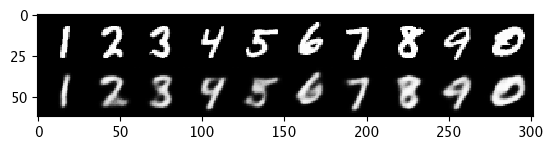

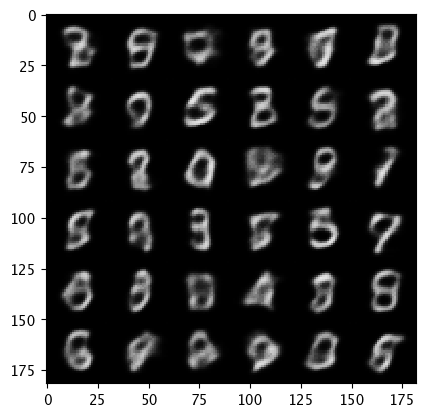

Writting saves/resnet_VAE_30d_MNIST_models/theta_best.dat

it 1/300, vlb -128.110624,    time: 98.642319 seconds

    vlb -109.554898 (-121.981682)



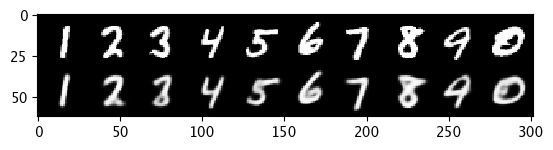

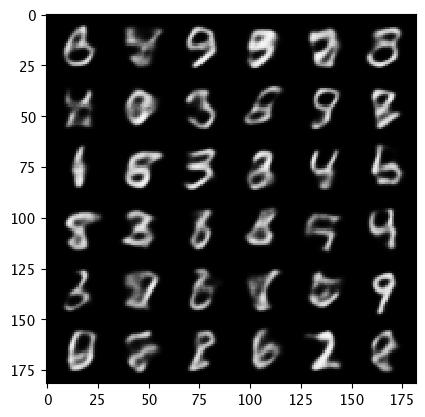

Writting saves/resnet_VAE_30d_MNIST_models/theta_best.dat

it 2/300, vlb -118.443894,    time: 101.156451 seconds

    vlb -104.599376 (-109.554898)



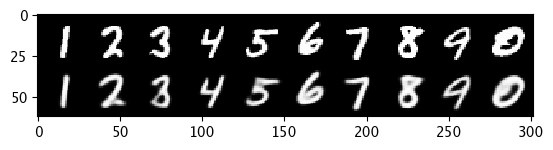

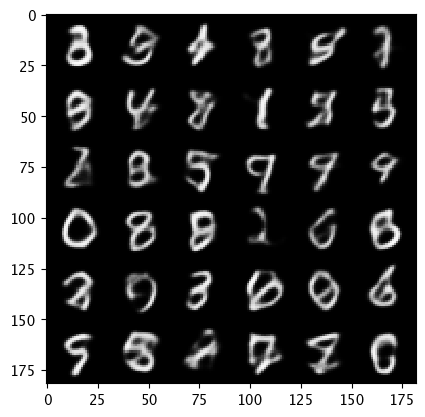

Writting saves/resnet_VAE_30d_MNIST_models/theta_best.dat

it 3/300, vlb -113.989031,    time: 98.546402 seconds

    vlb -101.276321 (-104.599376)



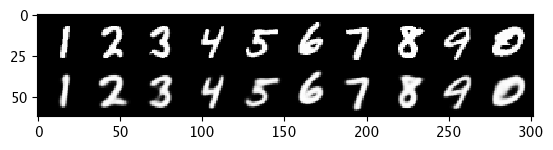

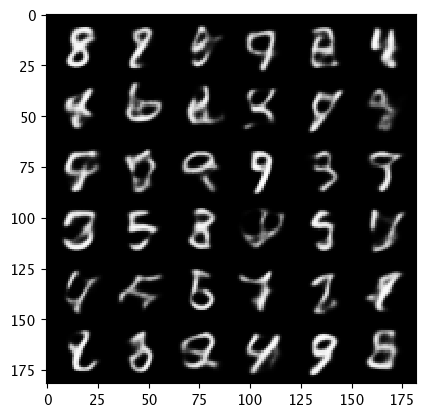

Writting saves/resnet_VAE_30d_MNIST_models/theta_best.dat

it 4/300, vlb -110.787041,    time: 97.768704 seconds

    vlb -98.155444 (-101.276321)



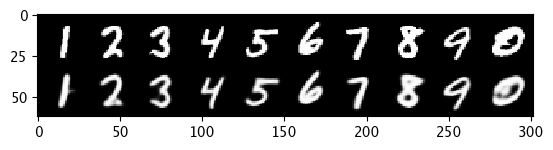

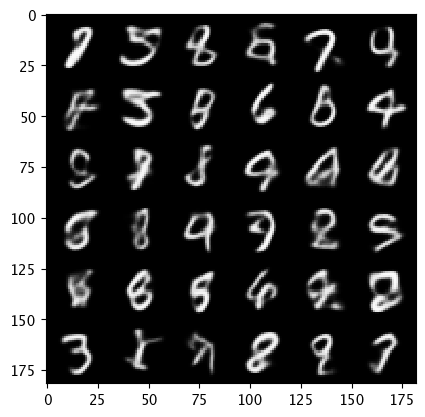

Writting saves/resnet_VAE_30d_MNIST_models/theta_best.dat

it 5/300, vlb -108.662029,    time: 111.336738 seconds

    vlb -97.638198 (-98.155444)



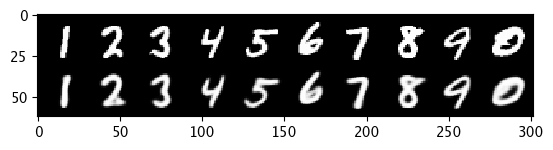

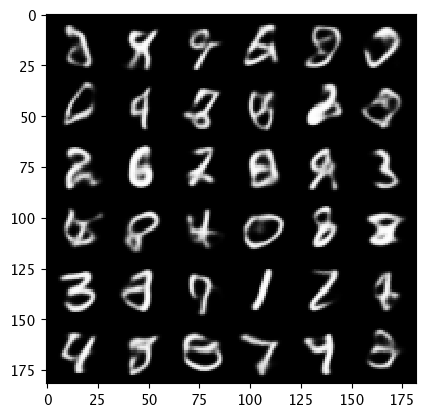

Writting saves/resnet_VAE_30d_MNIST_models/theta_best.dat

it 6/300, vlb -106.911528,    time: 111.115051 seconds

    vlb -96.538075 (-97.638198)



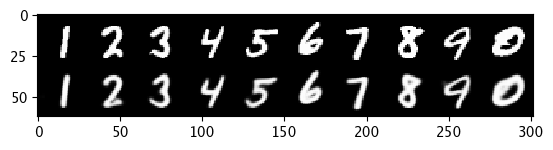

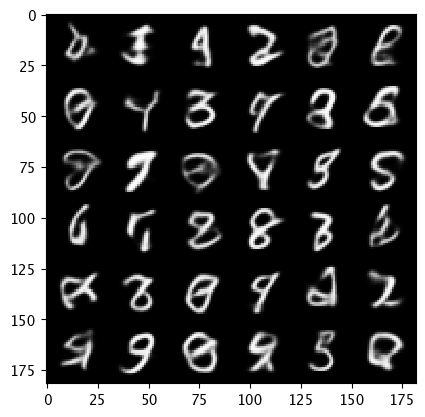

Writting saves/resnet_VAE_30d_MNIST_models/theta_best.dat



KeyboardInterrupt: 

In [2]:
import torch
from torchvision import datasets, transforms
from VAE.MNISTconv_bern import MNISTconv_VAE_bern_net
from VAE.train import train_VAE
from VAE.models import MNIST_generator_resnet, MNIST_recognition_resnet

# Set up data transforms
transform_train = transforms.Compose([
    transforms.ToTensor(),
])

transform_test = transforms.Compose([
    transforms.ToTensor(),
])

# Load MNIST dataset
trainset = datasets.MNIST(root='../data', train=True, download=True, transform=transform_train)
valset = datasets.MNIST(root='../data', train=False, download=True, transform=transform_test)

# Training parameters
latent_dim = 30  # You can adjust this (options used in example: 12, 16, 30, 40, 80)
batch_size = 256
nb_epochs = 300
lr = 7e-4
early_stop = 60

# Determine best available device
if torch.cuda.is_available():
    device = torch.device('cuda')
    cuda = True
elif torch.backends.mps.is_available():
    device = torch.device('mps') 
    cuda = False
else:
    device = torch.device('cpu')
    cuda = False


# Create encoder and decoder networks
encoder = MNIST_recognition_resnet(latent_dim)
decoder = MNIST_generator_resnet(latent_dim)

# Create VAE network
MNIST_bern_net = MNISTconv_VAE_bern_net(latent_dim, encoder, decoder, lr, device=device)

# Train the VAE
save_dir = 'saves'  # Adjust this path as needed
vlb_train, vlb_dev = train_VAE(
    MNIST_bern_net, 
    f'{save_dir}/resnet_VAE_{latent_dim}d_MNIST',
    batch_size, 
    nb_epochs, 
    trainset, 
    valset,
    cuda=cuda, 
    flat_ims=False, 
    train_plot=True,  # Set to True to see training visualizations
    early_stop=early_stop
)